# **Final project: Designing and implementing a deep learning model for a real-world application using TensorFlow and Python.**

## Universidad de Monterrey  

### School of Engineering and Technologies  

**Virgilio Del Bosque Luna 578255 | Ingeniería en Mecatrónica**  
**Víctor Manuel Contreras González 625627 | Ingeniería en Mecatrónica**

**Marcelo Garza Rodríguez 583252 | Ingeniería en Gestión Empresarial**

**Course:** Artificial Intelligence II

**Lecturer:** Dr. Andrés Hernández Gutiérrez  
**Due date:Sunday 8 December 2024**
San Pedro Garza García, Nuevo León

"Damos nuestra palabra de que hemos realizado esta actividad con integridad académica"

Av. Ignacio Morones Prieto 4500 Poniente. Col. Jesús M. Garza San Pedro Garza García Nuevo León, México C. P. 66238

###**Learning objective**
This project enables students to apply deep learning techniques to solve a real-world problem. Students will gain experience in developing theoretical frameworks and practical implementations, combining exploratory data analysis, model design, training, and evaluation of a deep learning model in Python using TensorFlow.

###**1. Application and deep learning techniques**
Each team must select:

• A real-world application as their focus.

• A deep learning technique, choosing from, but not limited to:

– Multilayer neural networks

– Deep neural networks

– Convolutional neural networks, including any of its variants, e.g., VVG16, VGG19,ResNet, U-Net, etc.

– Transfer learning.

– Self-supervised learning.

Nosotros seleccionamos: **Convolutional neural networks**

****

## **Introduction to the problem**

### Present a description of the chosen application and its importance.


 Dentro del equipo comenzamos a considerar elaborar un proyecto sobre la detección de emociones a través de gestos faciales, tras una plática con un conocido que es dueño de una agencia de marketing, la cual se dedica a realizar estudios de mercado, y nos comentaba acerca de las dificultades a las que se enfrentan al momento de realizar encuestas y lo sencillo que es que la información se sesgue; las personas a las que no les importa o no tienen tiempo, contestaran la encuesta sin prestar atención, y en general, únicamente quienes han tenido alguna queja sean quienes se tomen la molestia de hacer la
 encuesta de manera consciente, esto genera un sesgo en la información, que dificulta la interpretación y puede generar diferentes conflictos, cómo lo pudiera ser el buscar solucionar problemáticas que no necesariamente afectan la percepción del grueso de los clientes, o en su defecto, no detectar a tiempo las problemáticas que sí impactan en la percepción de los clientes.

 De está plática, y considerando lo aprendido en clase, es que surge la idea de buscar atacar está necesidad, que tras la investigación realizada nos dimos cuenta de que es solo una de cientos que se pudieran resolver con este tipo de implementaciones.


### Explain the main challenges associated with solving the problem.

 De acuerdo con A. Lapedriza (2019) “La Computación Afectiva (Affective Computing, en inglés), también conocida como Inteligencia Artificial Emocional, es la disciplina que estudia cómo crear máquinas que puedan reconocer, interpretar y responder apropiadamente a las emociones humanas”, está área de la ciencia de datos nace a principios de los años 90 pero no es hasta 1997 que se consolida tras la publicación de un primer libro relacionado a este tema, escrito por una profesora del MIT de nombre Rosalinda Picard.
 Está disciplina tiene aplicaciones en áreas como el neuromarketing, salud mental, seguridad y atención a clientes, volviéndose una de las principales a desarrollarse en los años siguientes.

 Existen diversos problemas asociados con la interpretación de emociones a través de imágenes, tanto por la parte humana como por la parte computacional, por un lado, los humanos no somos capaces en muchas ocasiones de identificar al 100% las emociones que sentimos, además la manera en la que nos expresamos, está altamente influenciada por la cultura a la que pertenecemos, la educación que recibimos, y en general vivencias únicas que forjan la manera en la que sentimos y expresamos esto que sentimos. Sin embargo, existe un término que ha sido desarrollado por el psicólogo Paul Ekman y que es de suma importancia para el Cómputo Afectivo, que son las microexpresiones, gesticulaciones faciales a veces imprevisibles para el ojo humano pero que tienen una alta
 correlación con las 5 emociones principales (Ira, miedo, alegría, asco y tristeza) y en teoría se presentan de manera universal y son producto de la evolución y del cómo nuestros antepasados se comunicaban situaciones de riesgo o beneficiosas para las comunidades. [2].


 Son entonces estas microexpresiones las que el modelo debe de identificar para realizar predicciones, pero es entonces que comienzan los problemas a los que nos enfrentamos en el desarrollo de nuestro modelo, en primer lugar, es de suma importancia considerar el tema de la calidad de las imágenes, ya que las imágenes pueden tener variaciones como ángulos, o iluminación que dificultan el procesamiento de la información, y el crear una base de datos donde se lleve este control, puede ser no solo tedioso y tardado sino también costo, por lo que tuvimos que elegir una base de datos pública de la cual no podemos
 asegurar estos detalles en la calidad de la imagen; aunado a esto, tomando en cuenta que lo que estamos buscando puede llegar a ser difícil de detectar inclusive por el ojo humano, el modelo debe de ser muy robusto para lograr identificar estos patrones y por consiguiente se requieren grandes cantidades de datos, lo que implicó que a pesar de haber utilizado las estrategias aprendidas en clase para la reducción de costo computacional, los modelos con
 los que estuvimos trabajando y realizando diversos ajustes en ocasiones llegaron a tardar en correr tiempos cercanos a las 3 horas, lo cual entorpece mucho el desarrollo del proyecto, ya que estabamos limitados por los equipos de computo con los que contamos, lo cual afecto en las metricas obtenidas por el modelo, ya que detectamos un area de oportunidad que se pudiera solucionar con modelos mas robustos que implicarian un mayor poder computacional.


### Highlight the role of deep learning in addressing these challenges.

 Para resolver este tipo de problemas, ya sea por medio de visión computacional o alguna otra alternativa (detección de signos cardiacos, estudio del comportamiento de diferentes zonas en el cerebro), el deep learning es fundamental para lograr procesar cantidades de datos tan grandes y poder detectar estos patrones en las expresiones que a su vez, requieren ser ponderadas para lograr hacer las clasificaciones.

###**Exploratory data analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os  # Módulo para interactuar con el sistema operativo.
import shutil  # Módulo para operaciones de archivos y directorios, como copiar y mover.
import random  # Módulo para generar valores aleatorios.
import matplotlib.pyplot as plt  # Biblioteca para visualización de datos y gráficos.
from PIL import Image  # Biblioteca para manipulación de imágenes.
import numpy as np  # Biblioteca para operaciones numéricas avanzadas con arrays.
from tensorflow.keras.applications import EfficientNetB0  # Modelo preentrenado EfficientNetB0 para tareas de clasificación de imágenes.
from tensorflow.keras.models import Model  # Clase para definir modelos personalizados en Keras.
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Capas para construir redes neuronales profundas.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Herramienta para preprocesamiento y aumento de imágenes.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para optimizar el entrenamiento.

# DESCARGA DEL DATASET DESDE KAGGLE

# Crear un directorio para el archivo de configuración de Kaggle.
os.system("mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json")
# Descargar el dataset desde Kaggle usando la API de Kaggle.
os.system("kaggle datasets download -d ananthu017/emotion-detection-fer -q")
# Descomprimir el archivo del dataset descargado en una carpeta específica.
os.system("unzip -q emotion-detection-fer.zip -d /content/emotion-dataset")
# Mensaje para confirmar que el dataset ha sido descargado y descomprimido correctamente.
print("Dataset descargado y descomprimido.")

Dataset descargado y descomprimido.


Se prepara el entorno para trabajar con un conjunto de datos descargado desde Kaggle. Primero, se importan las herramientas necesarias para manejar archivos, realizar cálculos numéricos, manipular imágenes y entrenar redes neuronales. Luego, se configura el acceso a la API de Kaggle mediante un archivo de credenciales, descarga un dataset de detección de emociones en formato comprimido y lo descomprime en una carpeta específica. Finalmente, imprime un mensaje de confirmación para indicar que el dataset está listo para ser usado en las etapas posteriores del proyecto.

In [ ]:
# Rutas de los directorios originales del dataset
original_train_dir = '/content/emotion-dataset/train'  # Carpeta de entrenamiento original.
original_test_dir = '/content/emotion-dataset/test'  # Carpeta de prueba original.

# Rutas de los nuevos directorios para el dataset filtrado
filtered_train_dir = '/content/emotion-dataset-filtered/train'  # Carpeta de entrenamiento filtrada.
filtered_test_dir = '/content/emotion-dataset-filtered/test'  # Carpeta de prueba filtrada.

# Clases seleccionadas que se incluirán en el dataset filtrado
selected_classes = ['happy', 'sad', 'angry']

# Crear carpetas para el dataset filtrado si no existen
os.makedirs(filtered_train_dir, exist_ok=True)  # Crear carpeta para el conjunto de entrenamiento filtrado.
os.makedirs(filtered_test_dir, exist_ok=True)  # Crear carpeta para el conjunto de prueba filtrado.

# Iterar sobre cada clase seleccionada para filtrar imágenes
for category in selected_classes:
    # Rutas de las carpetas de la clase actual en el dataset original y filtrado (entrenamiento)
    original_category_train = os.path.join(original_train_dir, category)  # Carpeta de entrenamiento de la clase original.
    filtered_category_train = os.path.join(filtered_train_dir, category)  # Carpeta de entrenamiento de la clase filtrada.

    # Crear carpeta para la clase en el dataset filtrado (entrenamiento)
    os.makedirs(filtered_category_train, exist_ok=True)

    # Copiar todas las imágenes de la clase actual desde el dataset original al filtrado (entrenamiento)
    for img in os.listdir(original_category_train):  # Iterar sobre los archivos de la clase.
        shutil.copy(os.path.join(original_category_train, img), filtered_category_train)  # Copiar imagen a la carpeta filtrada.

    # Rutas de las carpetas de la clase actual en el dataset original y filtrado (prueba)
    original_category_test = os.path.join(original_test_dir, category)  # Carpeta de prueba de la clase original.
    filtered_category_test = os.path.join(filtered_test_dir, category)  # Carpeta de prueba de la clase filtrada.

    # Crear carpeta para la clase en el dataset filtrado (prueba)
    os.makedirs(filtered_category_test, exist_ok=True)

    # Copiar todas las imágenes de la clase actual desde el dataset original al filtrado (prueba)
    for img in os.listdir(original_category_test):  # Iterar sobre los archivos de la clase.
        shutil.copy(os.path.join(original_category_test, img), filtered_category_test)  # Copiar imagen a la carpeta filtrada.

# Confirmación de que el dataset filtrado ha sido creado con éxito
print("Dataset filtrado creado con las clases seleccionadas.")

Dataset filtrado creado con las clases seleccionadas.


Este bloque de código organiza y filtra el dataset descargado para enfocarse únicamente en las clases seleccionadas (`happy`, `sad` y `angry`). Primero, se definen las rutas de los directorios originales y se crean nuevas carpetas para almacenar el dataset filtrado. Luego, se recorre cada clase seleccionada, copiando las imágenes de las carpetas originales de entrenamiento y prueba a las correspondientes carpetas filtradas, asegurándose de que solo se incluyan las categorías especificadas.

In [ ]:
# Configuración del generador de imágenes para realizar aumentos de datos
datagen = ImageDataGenerator(
    rotation_range=30,  # Rango de rotación aleatoria en grados.
    width_shift_range=0.3,  # Desplazamiento horizontal aleatorio como fracción del ancho de la imagen.
    height_shift_range=0.3,  # Desplazamiento vertical aleatorio como fracción de la altura de la imagen.
    shear_range=0.3,  # Transformación de corte aleatoria.
    zoom_range=0.3,  # Zoom aleatorio dentro del rango especificado.
    horizontal_flip=True,  # Volteo horizontal aleatorio.
    fill_mode='nearest'  # Modo de relleno para píxeles fuera de los límites.
)

# Crear un diccionario con las rutas de cada clase en el conjunto de entrenamiento filtrado
class_dirs = {class_name: os.path.join(filtered_train_dir, class_name) for class_name in selected_classes}

# Contar cuántas imágenes tiene cada clase
image_counts = {class_name: len(os.listdir(path)) for class_name, path in class_dirs.items()}

# Determinar la cantidad máxima de imágenes entre las clases
max_images = max(image_counts.values())

# Mostrar el conteo inicial de imágenes en cada clase antes del balanceo
print(f"Conteo de imágenes antes del balanceo: {image_counts}")

# Balancear el dataset mediante aumentos de datos
for class_name, path in class_dirs.items():
    current_count = image_counts[class_name]  # Número de imágenes actuales en la clase.
    if current_count < max_images:  # Si la clase tiene menos imágenes que la cantidad máxima:
        augment_count = max_images - current_count  # Número de imágenes adicionales necesarias.
        images = [os.path.join(path, img) for img in os.listdir(path)]  # Lista de rutas de las imágenes actuales.

        # Generar imágenes aumentadas hasta alcanzar el número máximo
        for i in range(augment_count):
            img_path = random.choice(images)  # Seleccionar una imagen aleatoria de la clase.
            img = Image.open(img_path).convert("RGB")  # Abrir la imagen y convertirla a formato RGB.
            img_array = np.expand_dims(np.array(img), axis=0)  # Expandir dimensiones a (1, height, width, channels).
            augmented_img = next(datagen.flow(img_array, batch_size=1))[0]  # Generar una imagen aumentada.
            augmented_img = Image.fromarray(augmented_img.astype('uint8'))  # Convertir el array aumentado a imagen.
            augmented_img.save(os.path.join(path, f"aug_{i}.jpg"))  # Guardar la imagen aumentada en el directorio.

# Contar las imágenes nuevamente después del balanceo
image_counts_after = {class_name: len(os.listdir(path)) for class_name, path in class_dirs.items()}

# Mostrar el conteo final de imágenes en cada clase
print(f"Conteo de imágenes después del balanceo: {image_counts_after}")

Conteo de imágenes antes del balanceo: {'happy': 7215, 'sad': 4830, 'angry': 3995}
Conteo de imágenes después del balanceo: {'happy': 7215, 'sad': 7215, 'angry': 7215}


Se generan más imágenes para equilibrar la cantidad de imágenes en cada clase seleccionada. Se configura el generador (`datagen`) para aplicar transformaciones aleatorias como rotaciones, desplazamientos, cortes, zoom y volteos horizontales, etc. Luego, se calcula la cantidad de imágenes en cada clase y se identifica la clase con el mayor número de imágenes (`max_images`) como referencia para el balanceo.

Para las clases con menos imágenes, se generan imágenes adicionales mediante aumentos de datos. Esto se realiza seleccionando aleatoriamente imágenes existentes, aplicándoles transformaciones con el generador, y guardando las nuevas imágenes en las carpetas correspondientes. Al final, se verifica y muestra el conteo de imágenes en cada clase después del balanceo. Este proceso mejora la diversidad de los datos y asegura que todas las clases tengan representaciones similares, lo que ayuda a evitar sesgos en el entrenamiento del modelo y en las métricas.

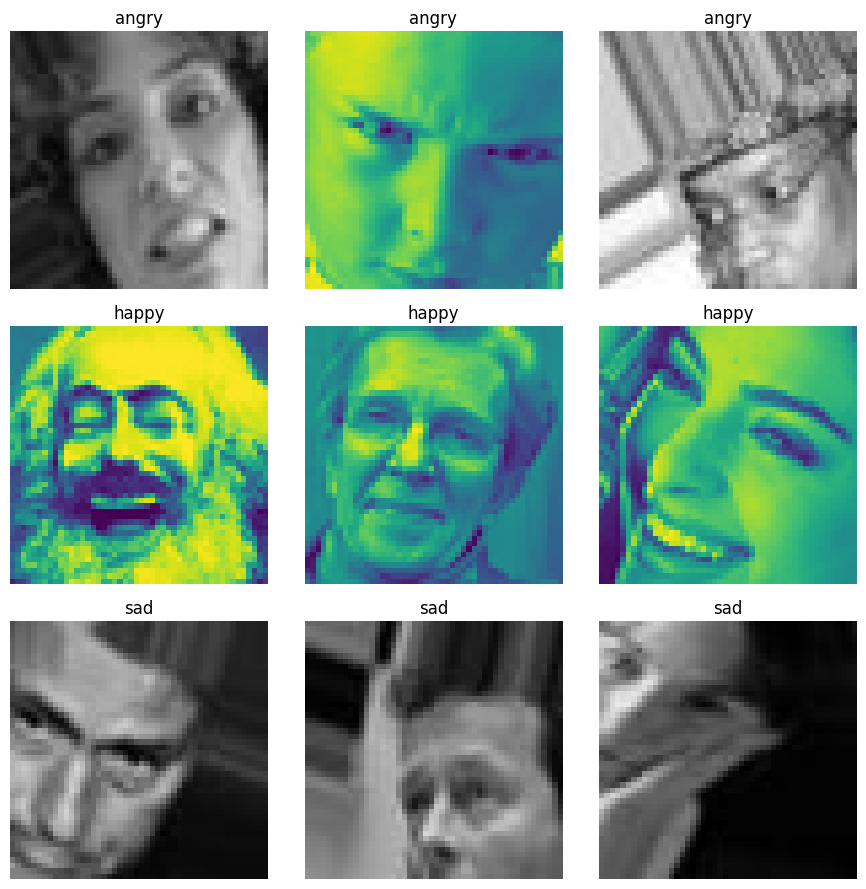

In [ ]:
# VISUALIZAR IMÁGENES

# Función para visualizar imágenes
def visualize_sample_images(dataset_path, images_per_category=3):

    # Obtener una lista de las categorías
    categories = os.listdir(dataset_path)

    # Crear un subplot para visualizar las imágenes
    fig, axes = plt.subplots(
        len(categories), images_per_category,  # Filas = categorías, columnas = imágenes por categoría.
        figsize=(images_per_category * 3, len(categories) * 3)  # Ajustar el tamaño de la figura.
    )

    # Iterar sobre cada categoría
    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)  # Ruta de la carpeta de la categoría.
        images = os.listdir(category_path)  # Obtener lista de imágenes en la categoría.
        random.shuffle(images)  # Mezclar aleatoriamente las imágenes para mostrar diferentes ejemplos.

        # Seleccionar y mostrar imágenes de la categoría actual
        for j in range(min(images_per_category, len(images))):  # Asegurarse de no exceder el número de imágenes disponibles.
            image_path = os.path.join(category_path, images[j])  # Ruta de la imagen seleccionada.
            image = Image.open(image_path)  # Abrir la imagen.

            ax = axes[i, j]  # Seleccionar el subplot.
            ax.imshow(image)  # Mostrar la imagen en el subplot.
            ax.axis('off')  # Ocultar los ejes.
            ax.set_title(category)  # Insertar el título con el nombre de la categoría.

    plt.tight_layout()
    plt.show()  # Mostrar la figura.

# Llamar a la función para visualizar imágenes del conjunto de entrenamiento
visualize_sample_images(filtered_train_dir)

Aquí se puede visualizar una muestra de imágenes del conjunto de datos filtrado, organizado por categorías. La función visualize_sample_images toma como entrada la ruta del dataset y el número de imágenes que se desea mostrar por categoría.

###**Model development (training, validation, and testing)**

In [ ]:
from tensorflow.keras.models import Sequential  # Clase para construir modelos secuenciales.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Capas para CNNs.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Herramienta para preprocesar y aumentar imágenes.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para optimizar el entrenamiento.

# Generador de datos para el conjunto de entrenamiento con aumentos
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalizar píxeles al rango [0, 1].
    rotation_range=20,  # Rotación aleatoria en grados.
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio.
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio.
    shear_range=0.2,  # Transformación de corte aleatoria.
    zoom_range=0.2,  # Zoom aleatorio.
    horizontal_flip=True  # Volteo horizontal aleatorio.
)

# Generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Configurar generador para leer datos del conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    filtered_train_dir,  # Ruta al directorio del conjunto de entrenamiento.
    target_size=(64, 64),  # Redimensionar imágenes a 64x64 píxeles.
    batch_size=32,  # Tamaño del lote.
    class_mode='categorical'  # Clasificación con etiquetas categóricas.
)

# Configurar generador para leer datos del conjunto de prueba
test_generator = test_datagen.flow_from_directory(
    filtered_test_dir,  # Ruta al directorio del conjunto de prueba.
    target_size=(64, 64),  # Redimensionar imágenes a 64x64 píxeles.
    batch_size=32,  # Tamaño del lote.
    class_mode='categorical'  # Clasificación con etiquetas categóricas.
)

# Función para crear el modelo CNN
def create_cnn_model(input_shape=(64, 64, 3), num_classes=3):
    model = Sequential([
        # Primera capa convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),  # 32 filtros, tamaño 3x3.
        BatchNormalization(),  # Normalización para mejorar estabilidad y acelerar entrenamiento.
        MaxPooling2D(pool_size=(2, 2)),  # Reducción de tamaño con pooling.

        # Segunda capa convolucional
        Conv2D(64, (3, 3), activation='relu', padding='same'),  # 64 filtros, tamaño 3x3.
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Tercera capa convolucional
        Conv2D(128, (3, 3), activation='relu', padding='same'),  # 128 filtros, tamaño 3x3.
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Capas densas para clasificación
        Flatten(),  # Aplanar la salida
        Dense(256, activation='relu'),  # Capa completamente conectada con 256 unidades.
        BatchNormalization(),
        Dropout(0.2),  # Desactivar el 20% de las neuronas para reducir el sobreajuste.
        Dense(num_classes, activation='softmax')  # Capa de salida con softmax para clasificación multiclase.
    ])
    return model

# Crear el modelo CNN
model = create_cnn_model(input_shape=(64, 64, 3), num_classes=3)

# ENTRENAR MODELO

# Compilar el modelo especificando el optimizador, función de pérdida y métricas
model.compile(
    optimizer='adam',  # Optimizador Adam para ajuste eficiente de pesos.
    loss='categorical_crossentropy',  # Pérdida para clasificación multiclase.
    metrics=['accuracy']  # Métrica para monitorear la precisión.
)

# Configurar callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Detener si la pérdida no mejora.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)  # Reducir la tasa de aprendizaje si no mejora.

# Entrenar el modelo
history = model.fit(
    train_generator,  # Datos de entrenamiento.
    epochs=26,  # Número máximo de épocas.
    validation_data=test_generator,  # Datos de validación.
    callbacks=[early_stopping, reduce_lr]  # Callbacks para optimización del entrenamiento.
)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")  # Imprimir pérdida y precisión.

# Guardar el modelo entrenado
model.save('/content/emotion_cnn_model.h5')
print("Modelo guardado como 'emotion_cnn_model.h5'.")

Found 21645 images belonging to 3 classes.
Found 3979 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/26


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


677/677 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.3723 - loss: 1.4233 - val_accuracy: 0.4549 - val_loss: 1.6063 - learning_rate: 0.0010
Epoch 2/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.4376 - loss: 1.0570 - val_accuracy: 0.3712 - val_loss: 1.2728 - learning_rate: 0.0010
Epoch 3/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.4912 - loss: 0.9860 - val_accuracy: 0.5109 - val_loss: 0.9791 - learning_rate: 0.0010
Epoch 4/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.5231 - loss: 0.9307 - val_accuracy: 0.3285 - val_loss: 2.4973 - learning_rate: 0.0010
Epoch 5/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.5472 - loss: 0.8926 - val_accuracy: 0.5079 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 6/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.5990 - loss: 0.8193 - val_accuracy: 0.6708 - val_loss: 0.7147 - learning_rate: 2.0000e-04
Epoch 7/26
677/677 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.6169 - loss: 0.

Loss: 0.6188, Accuracy: 0.7331
Modelo guardado como 'emotion_cnn_model.h5'.


Se implementa y entrena una red neuronal convolucional (CNN) para clasificar emociones en imágenes. Primero, se configuran generadores de datos para preparar las imágenes de entrenamiento y prueba, normalizándolas y aplicando aumentos como rotaciones, desplazamientos y volteos, lo que mejora la capacidad del modelo para generalizar. Luego, se define la arquitectura de la CNN. El modelo se compila utilizando el optimizador Adam durante un máximo de 26 épocas con los datos generados, y luego se evalúa en el conjunto de prueba para obtener su pérdida y precisión.

###**Performance metrics**

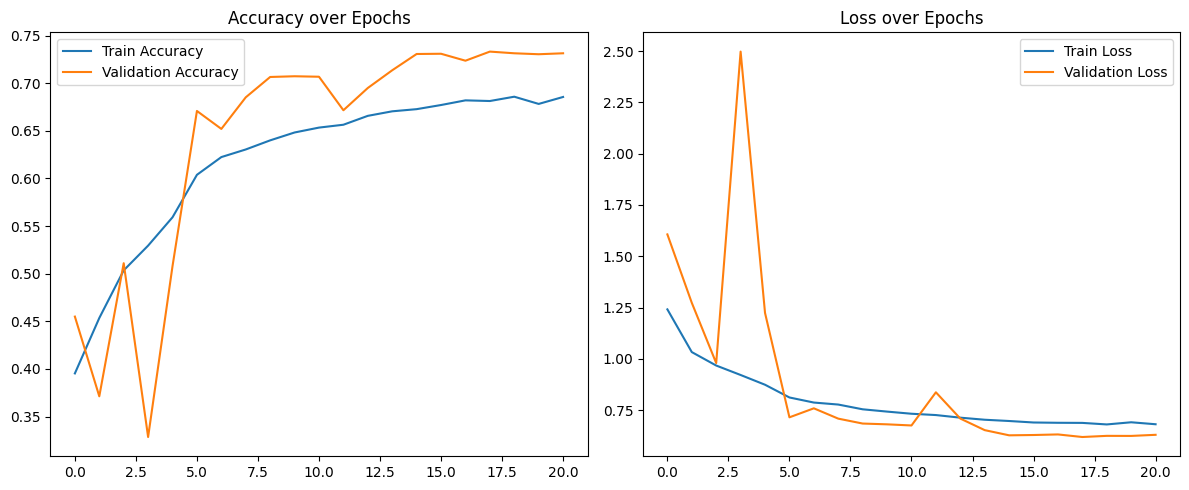

In [ ]:
# Función para graficar la historia del entrenamiento
def plot_training_history(history):

    plt.figure(figsize=(12, 5))  # Crear una figura de cierto tamaño.

    # Subplot para graficar la precisión
    plt.subplot(1, 2, 1)  # Crear el primer subplot en una figura de 1 fila y 2 columnas.
    plt.plot(history.history['accuracy'], label='Train Accuracy')  # Precisión del entrenamiento.
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Precisión de validación.
    plt.legend()  # Mostrar la leyenda para distinguir entre las curvas.
    plt.title('Accuracy over Epochs')  # Título del gráfico de precisión.

    # Subplot para graficar la pérdida
    plt.subplot(1, 2, 2)  # Crear el segundo subplot.
    plt.plot(history.history['loss'], label='Train Loss')  # Pérdida del entrenamiento.
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Pérdida de validación.
    plt.legend()  # Mostrar la leyenda para distinguir entre las curvas.
    plt.title('Loss over Epochs')  # Título del gráfico de pérdida.

    plt.tight_layout()
    plt.show() # Mostrar

# Llamar a la función para graficar la historia del entrenamiento
plot_training_history(history)

El modelo muestra un buen equilibrio entre las curvas de entrenamiento y validación, lo que indica que está generalizando bien sin caer en problemas graves de sobreajuste.

Aunque hay cierta variación en la precisión y la pérdida de validación al inicio, la convergencia hacia valores estables al final de las épocas refleja que el entrenamiento fue efectivo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


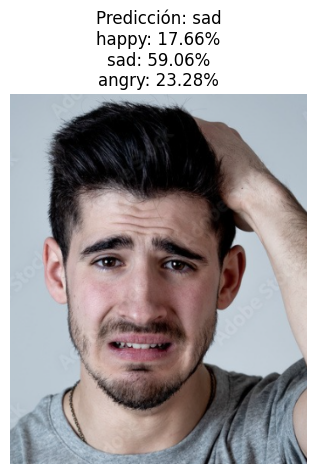

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


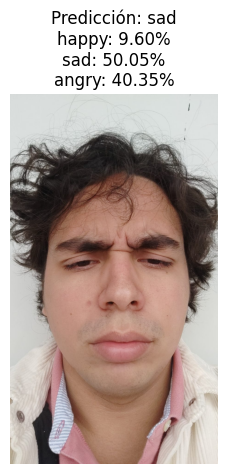

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


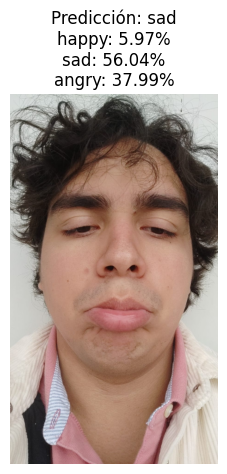

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


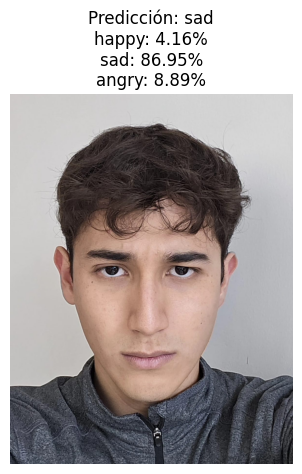

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


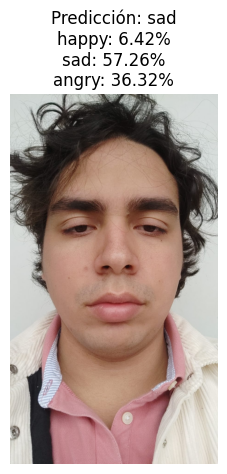

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


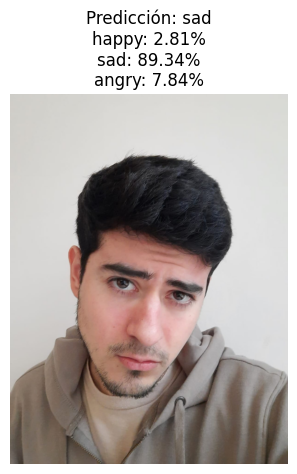

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


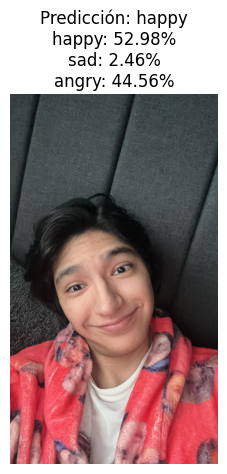

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


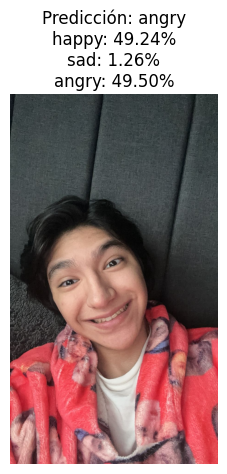

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Ruta a la carpeta que contiene las imágenes
image_folder = "/content/drive/Shareddrives/Inteligenia/Final Emociones/IMG"

# Clases del modelo
class_labels = ['happy', 'sad', 'angry']

# Función para predecir la clase de una imagen y mostrar la imagen
def predict_emotion_and_show(image_path, model, class_labels):
    # Cargar y preprocesar la imagen
    img = load_img(image_path, target_size=(64, 64))  # Redimensionar
    img_array = img_to_array(img)  # Convertir a array numpy
    img_array = img_array / 255.0  # Normalizar (como en el generador de datos)
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para lote

    # Hacer predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Índice de la clase con mayor probabilidad
    probabilities = prediction[0]  # Probabilidades para cada clase

    # Mostrar imagen y resultados
    plt.imshow(load_img(image_path))
    plt.axis('off')
    plt.title(f"Predicción: {class_labels[predicted_class]}\n"
              + "\n".join([f"{label}: {prob:.2%}" for label, prob in zip(class_labels, probabilities)]))
    plt.show()

# Obtener una lista de todas las imágenes en la carpeta
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Evaluar y mostrar resultados para cada imagen
for image_path in image_paths:
    predict_emotion_and_show(image_path, model, class_labels)

Como resultado del código, se prueba y se visualiza cómo el modelo clasifica las imágenes dependiendo de la emoción. Además, se puede observar qué predicción realizó el modelo y los porcentajes asociados a cada emoción presente.

Estas pruebas se llevaron a cabo como una forma de validación del modelo. No obstante, se detectaron algunos resultados muy próximos en la predicción de dos emociones. Por ejemplo, en las fotos de la persona al final, se aprecia que el modelo asigna casi el mismo porcentaje a las emociones de felicidad y enojo. De manera similar, en la foto donde aparece el integrante Marcelo, se obtuvieron resultados de 50.05% para tristeza y 40.35% para enojo. Si bien es posible que la imagen no refleje completamente la emoción de tristeza, el modelo se encuentra próximo a realizar dichas predicciones.


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Accuracy: 0.3717
Precision: 0.3622
Recall: 0.3717
F1-score: 0.3655


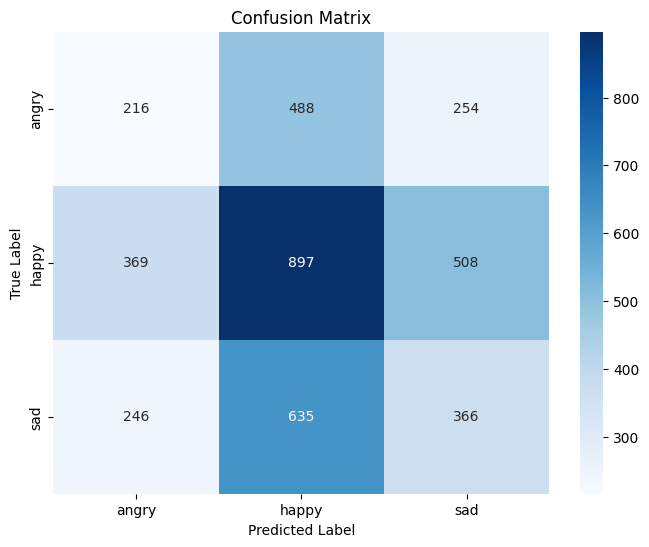

Classification Report:
              precision    recall  f1-score   support

       angry       0.26      0.23      0.24       958
       happy       0.44      0.51      0.47      1774
         sad       0.32      0.29      0.31      1247

    accuracy                           0.37      3979
   macro avg       0.34      0.34      0.34      3979
weighted avg       0.36      0.37      0.37      3979



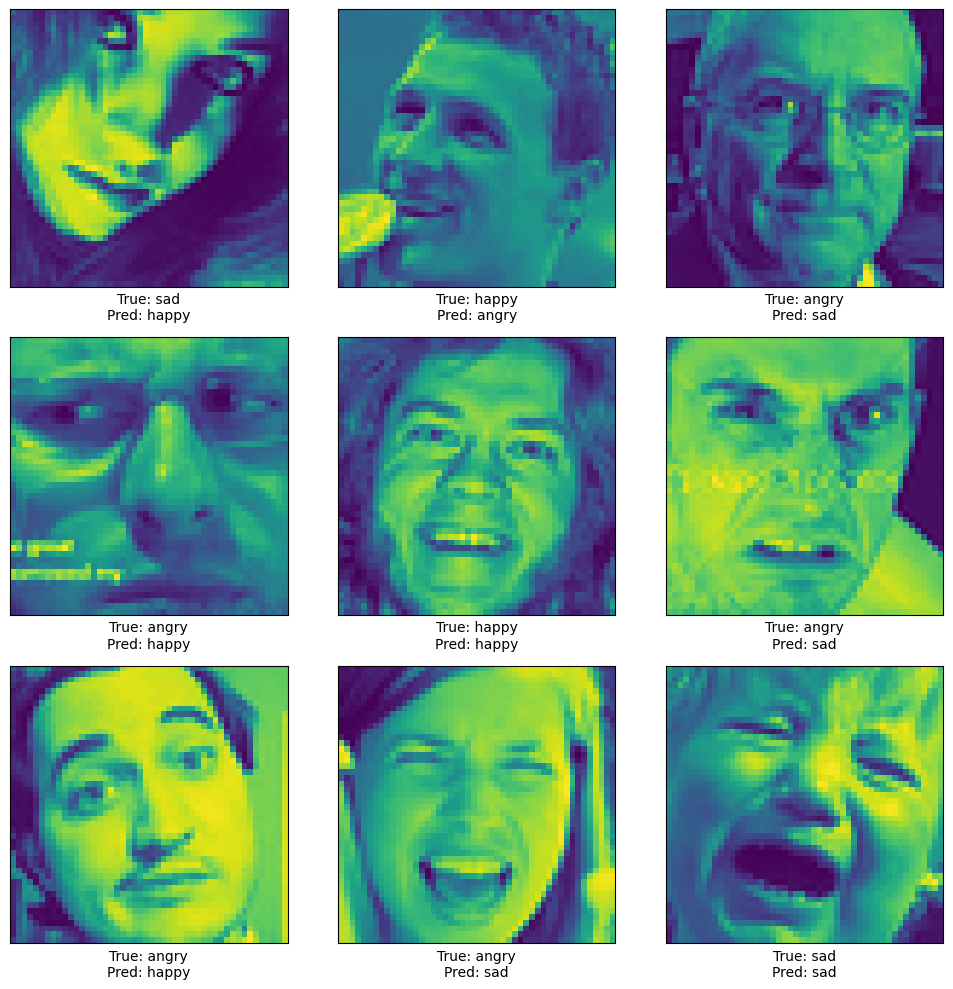

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Cargar el modelo previamente guardado


# Obtener predicciones del modelo
y_pred = np.argmax(model.predict(test_generator), axis=1)  # Predicciones del modelo
y_true = test_generator.classes  # Etiquetas reales del conjunto de prueba

# Clases de etiquetas
class_labels = list(test_generator.class_indices.keys())

# MÉTRICAS DE DESEMPEÑO
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# REPORTE DE CLASIFICACIÓN
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

# VISUALIZAR ALGUNAS PREDICCIONES
def visualize_predictions(generator, true_labels, pred_labels, class_names):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(true_labels), size=9, replace=False)  # Selección aleatoria de imágenes
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img_path = generator.filepaths[idx]  # Obtener la ruta de la imagen
        img = plt.imread(img_path)  # Cargar la imagen
        true_class = class_names[true_labels[idx]]
        pred_class = class_names[pred_labels[idx]]
        plt.imshow(img)
        plt.xlabel(f"True: {true_class}\nPred: {pred_class}")
    plt.tight_layout()
    plt.show()

# Visualizar predicciones
visualize_predictions(test_generator, y_true, y_pred, class_labels)

**explicar salida**

Tras el análisis de las métricas obtenidas por el modelo, se evidencia un área de oportunidad para el modelo, que como equipo, llegamos a la conclusión de que se debe en gran parte a la calidad de la base de datos, ya que, como se mencionó anteriormente en el proyecto, las microexpresiones que son principalmente lo que pudiera dictar al modelo en que categoría agrupar cada imagen, requieren de un alto detalle para lograr identificar, ya que sin esto, por ejemplo, pudiera ser muy difícil identificar la diferencia entre las arrugas que se generan a un lado de los labios cuando apretamos la boca por enojo y aquellas que se generan cuando bajamos los labios si hacemos una mueca de tristeza.

Dicho lo anterior, en la métrica de confusión logramos entender lo siguiente:

La felicidad es la emoción que el modelo logra categorizar con mayor éxito, esto lo adjudicamos a el hecho de que es la única de las categorías en las que la boca se debería de mostrar abierta, lo que pudo haber facilitado que el modelo identifique este patrón, o posiblemente la detección de las líneas verticales de la dentadura al sonreír.

El enojo es la emoción con la que el modelo tuvo menor éxito, siendo que la mayoría de las imágenes las etiquetado como felicidad, creemos que esto se debe a que al momento de sonreir, elevamos los pómulos, lo que provoca que nuestros ojos se rasguen, y al momento de fruncir el ceño con una cara de enojo, se produce un efecto similar, lo que pudiera estar generando conflicto en el modelo, caso similar sucede con las arrugas que se forman sobre la frente al momento de sonreír que también se perciben al momento de hacer una cara de tristeza (ver la foto de vico) y viceversa, ya que también hay una gran cantidad de imágenes etiquetadas como felicidad que el modelo percibe como tristeza.

El análisis de las métricas obtenidas nos deja un sabor agridulce, donde por un lado pudiéramos concluir que el modelo en efecto logra detectar a grandes rasgos este tipo de detalles como arrugas en la frente, la posición de las cejas, la apertura de labios y ojos, las arrugadas de los ojos conocidas como “patas de gallo”, entre otros rasgos; pero por otro lado, nos hace considerar un detalle que no habíamos tenido en cuenta, que es la manifestación de estos detalles en diferentes emociones con ligeros cambios, que son estos ligeros cambios, los que el modelo no termina de detectar; creando así una limitación y un punto de partida para seguir elaborando este proyecto.

También es importante destacar que al momento de nosotros enviar imágenes propias al modelo, las logra predecir con facilidad, esto pudiera deberse a que realizamos expresiones muy exageradas y a que la calidad de las imágenes es mejor.


# Conclusiones

### Virgilio

En el desarrollo de este proyecto se pusieron a prueba los conocimientos adquiridos en clase. A diferencia de otros proyectos, en este trabajamos con el procesamiento de imágenes, algo que me llamó mucho la atención porque es un tema con el que casi no hemos trabajado en clase. Además, considero que tiene aplicaciones tanto en la industria como en la vida cotidiana, ya sea en el procesamiento de información, como números, detección de fallas estructurales, y en nuestro caso, la detección de emociones humanas.

Sin duda, el proyecto representó un reto. Si bien utilizamos redes neuronales convolucionales, el tiempo de ejecución fue demasiado alto. Inicialmente, queríamos desarrollar un proyecto de análisis de desgastes en llantas para optimizar los tiempos de traslado de materiales, pero al momento de entrenar el modelo, este no se ejecutaba en mi caso, seguramente debido al poder computacional requerido. Al analizar la situación, optamos por el procesamiento y análisis de emociones, un tema que considero de gran interés, especialmente en términos de seguridad y satisfacción.

Para el desarrollo del proyecto utilizamos técnicas como batch normalization, dropout, y algo importante a mencionar fue que equilibramos las muestras de entrenamiento. Esto se debió a que había más muestras de la emoción "feliz" en comparación con "triste" o "enojo". Asimismo, incrementamos las capas de la red para aprovechar más procesamiento. Gracias al entorno de ejecución T4, el tiempo de entrenamiento no fue tan extenso.

Sin duda, el proyecto fue desafiante, ya que trabajar con emociones es algo complicado. Esto se debe a que las fotos de la base de datos, si bien eran buenas, no eran quizás tan representativas de una foto tomada directamente con un celular en tiempo real. Espero que en un futuro pueda seguir desarrollando proyectos con aplicaciones tanto en la industria como en la vida cotidiana. Además, quiero continuar aprendiendo sobre inteligencia artificial para resolver problemas como los que surgieron en este proyecto y muchos otros en el futuro. Sin duda alguna, espero seguir profundizando en este fascinante tema.


### Víctor

En este proyecto se desarrolló un modelo de red neuronal convolucional (CNN) para clasificar emociones a partir de imágenes. Primero, se seleccionaron clases específicas de emociones (feliz, triste y enojado) para no hacer el modelo tan pesado y se balancearon los datos. Luego, se creó un modelo CNN que procesó las imágenes para identificar patrones visuales asociados con cada emoción. La naturaleza de trabajar con caras humanas es algo complicado, pero se intentó escalar el proyecto lo mejor que se pudo por el tiempo y la potencia computacional disponible.

El entrenamiento del modelo fue optimizado con técnicas como early stopping y tasas de aprendizaje para evitar el sobreajuste y mejorar el rendimiento. Además, se generaron gráficos para analizar cómo evolucionaron la precisión y la pérdida durante las épocas, lo que permitió entender mejor el comportamiento del modelo. Estos mostraron una cierta robustez del desempeño del modelo, y sí se vio reflejado ese ~70% en las predicciones de las fotos de rostros nuestros y de amigos. Se intentaron usar otros métodos de aprendizaje como el transfer learning, pero no se obtuvieron buenos resultados en comparación al tiempo excesivo extra de entrenamiento.

Se logró entrenar y evaluar un modelo que puede clasificar emociones con una mediana precisión, mostrando el potencial de las redes neuronales para resolver problemas complejos como el análisis de imágenes. Este proyecto no solo permitió poner en práctica conceptos de visión por computadora, ayudando a desarrollar habilidades clave para proyectos futuros.

### Marcelo

 Si bien teníamos alguna noción de que está área de la ciencia de datos existía, no habíamos profundizado en sus aplicaciones y relevancia, sobre todo nos parece algo sumamente interesante por la combinación de dos áreas de la ciencia que pudieran ser tan contrastantes cómo lo son la psicología y las humanidades con la ingeniería computacional y ciencia de datos, y que además, al reflexionar sobre este tema, llegamos a la convulsión de que el desarrollo de está área de la inteligencia artificial es en gran parte el rezago que
 encontramos en las tecnologías actuales contra aquellas “fantasiosas” que vemos en películas como her, yo robot, o wall-e, donde los robots y asistentes virtuales buscan comprender y simular las emociones humanas; entonces nos preguntamos y reflexionamos, ¿Lograremos que las piedras sientan?

Sin duda este proyecto generó en mí un interés por un tema el cual desconocia y que a raiz de lo investigado me ha generado un importante interés por seguir investigando no solo la parte tecnológica de este tipo de problemas, si no la parte humana ya que me parece muy interesante como los humanos tenemos este tipo de gesticulaciones arraigadas a nuestra naturaleza y los beneficios que el saber reconocerlos puede tener para mi vida social o inclusive laboral al poder identificar de manera más adecuada la percepción que alguna persona esté teniendo en x tema.

En cuanto a el proyecto, considero que es un excelente punto de partida el haber logrado detectar ciertos patrones, sin embargo me quedo con la tarea de seguir desarrollando el modelo de manera que logre identificar los cambios en estos patrones que son los que realmente diferencian a una emoción de otra, además de buscar ponderar no solo los rasgos, sino el conjunto de los mismos, por ejemplo, unas cejas hacia abajo pudiera denotar tristeza y enojo a la vez, pero si a esto se le agregan las fosas nasales dilatadas, pudiéramos entonces identificar qué se trata de enojo.


# Referencias

[1] Garcia, A. L. (2022, December 10). Computación afectiva. ¿Un robot puede tener empatía? Tecnología++. https://blogs.uoc.edu/informatica/es/computacion-afectiva/

[2] Triglia, A. (2024, 19 agosto). ​Paul Ekman y el estudio de las microexpresiones. Psicología y Mente. https://psicologiaymente.com/psicologia/paul-ekman-estudio-microexpresiones

[3] Emotion detection. (2020, December 11). https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
